## Logistic Regression

In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


### 1. What is Logistic Regression?

Logistic Regression is a classification algorithm used to predict binary outcomes. It models the probability that a given input belongs to a specific category using the sigmoid function.

### 2. Mathematical Equation of Logistic Regression

$h_{\theta}(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}$

### 3. Sigmoid Function

In [2]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### 4. Cost Function of Logistic Regression

In [3]:

def log_loss(y_true, y_pred):
    m = len(y_true)
    return - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


### 5. Regularization in Logistic Regression

Regularization prevents overfitting by penalizing large coefficients. It includes L1 (Lasso), L2 (Ridge), and Elastic Net.

### 6. Difference between Lasso, Ridge, and Elastic Net

- **Lasso (L1):** Shrinks some coefficients to 0 (feature selection).  
- **Ridge (L2):** Shrinks coefficients but retains all features.  
- **Elastic Net:** Combines both L1 and L2 regularization.

### 7. Choosing Elastic Net over Lasso or Ridge

Use Elastic Net when features are highly correlated or when Lasso is too aggressive in feature elimination.

### 8. Impact of Regularization Parameter (λ)

Higher λ: More regularization → Simpler model, avoids overfitting.  
Lower λ: Less regularization → More complex model, risk of overfitting.

### 9. Assumptions of Logistic Regression

1. Observations are independent.
2. No multicollinearity.
3. Linear relationship between features and log-odds.

### 10. Alternatives to Logistic Regression

- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- Naïve Bayes
- Neural Networks

### 11. Classification Evaluation Metrics

- Accuracy
- Precision, Recall, F1-score
- ROC-AUC
- Confusion Matrix

### 12. Class Imbalance in Logistic Regression

- Causes biased predictions towards the majority class.  
- **Solutions:** Class weighting, oversampling/undersampling, using F1-score.

### 13. Hyperparameter Tuning in Logistic Regression

Hyperparameters like regularization strength (λ) can be tuned using GridSearchCV.

### 14. Solvers in Logistic Regression

In [4]:

solvers = ['liblinear', 'lbfgs', 'newton-cg', 'saga']


- **'liblinear'** → Small datasets, supports L1 & L2.  
- **'lbfgs'** → Default solver, works for multiclass.  
- **'newton-cg'** → Good for L2.  
- **'saga'** → Suitable for large datasets.

### 15. Multiclass Logistic Regression

**One-vs-Rest (OvR):** Trains multiple binary classifiers.  
**Softmax Regression:** Assigns probabilities to multiple classes.

### 16. Advantages & Disadvantages

**Advantages:**
- Simple, interpretable, efficient.

**Disadvantages:**
- Assumes linearity in log-odds.
- Sensitive to outliers.

### 17. Use Cases

- Medical Diagnosis
- Credit Scoring
- Spam Detection
- Fraud Detection

### 18. Softmax Regression vs Logistic Regression

- **Logistic Regression** → Binary Classification.
- **Softmax Regression** → Multiclass Classification.

### 19. Choosing OvR vs Softmax

- **OvR:** Small datasets, interpretable.
- **Softmax:** Large datasets, better probabilistic interpretation.

### 20. Interpreting Coefficients in Logistic Regression

In [5]:

def interpret_coefficients(coefs):
    return np.exp(coefs)


Exp(theta) gives the odds ratio → A value >1 means increased odds, <1 means decreased odds.

In [6]:
# 1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset

# Load a sample dataset (Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [7]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset

# Load a sample dataset (Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with L1 regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy with L1 Regularization (Lasso): {accuracy:.4f}")




Model Accuracy with L1 Regularization (Lasso): 1.0000


In [8]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients

# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset

# Load a sample dataset (Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with L2 regularization (Ridge)
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and model coefficients
print(f"Model Accuracy with L2 Regularization (Ridge): {accuracy:.4f}")
print("Model Coefficients:")
print(model.coef_)


Model Accuracy with L2 Regularization (Ridge): 1.0000
Model Coefficients:
[[-0.39349364  0.96246717 -2.3751418  -0.99874814]
 [ 0.50845582 -0.25479812 -0.21300858 -0.77574559]
 [-0.11496218 -0.70766905  2.58815039  1.77449373]]


In [9]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [10]:
# 4. Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
def train_logistic_regression_elasticnet():
    # Load sample dataset (Iris dataset)
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target)
    
    # Initialize the Logistic Regression model with Elastic Net regularization
    model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=200, l1_ratio=0.5)
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    print(f"Elastic Net Regularization Model Accuracy: {accuracy:.4f}")

train_logistic_regression_elasticnet()

Elastic Net Regularization Model Accuracy: 0.9867


In [11]:
#5.Logistic Regression for Multiclass Classification using 'ovr' (One-vs-Rest)
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
def train_logistic_regression_multiclass():
    # Load sample dataset (Iris dataset)
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target)
    
    # Initialize the Logistic Regression model with 'ovr' (One-vs-Rest)
    model = LogisticRegression(multi_class='ovr', max_iter=200)
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    print(f"Multiclass Logistic Regression (OVR) Model Accuracy: {accuracy:.4f}")

train_logistic_regression_multiclass()

Multiclass Logistic Regression (OVR) Model Accuracy: 0.9533


In [12]:
#6.GridSearchCV to tune hyperparameters (C and penalty)

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

def tune_logistic_regression_hyperparameters():
    # Load sample dataset (Iris dataset)
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target)
    
    # Define Logistic Regression model
    model = LogisticRegression(max_iter=200)
    
    # Define hyperparameters for GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
    }
    
    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    
    # Get best parameters and accuracy
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Accuracy: {grid_search.best_score_:.4f}")

tune_logistic_regression_hyperparameters()

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.9733


In [13]:
#7.Logistic Regression with Stratified K-Fold Cross-Validation
def evaluate_logistic_regression_stratified_kfold():
    # Load sample dataset (Iris dataset)
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target)
    
    # Initialize Logistic Regression model
    model = LogisticRegression(max_iter=200)
    
    # Perform Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(model, X, y, cv=skf)
    
    # Print average accuracy
    print(f"Average Accuracy using Stratified K-Fold CV: {cross_val_scores.mean():.4f}")

evaluate_logistic_regression_stratified_kfold()

Average Accuracy using Stratified K-Fold CV: 0.9667


In [14]:
# 8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

def load_and_evaluate_logistic_regression(csv_file):
    # Load dataset from CSV file
    data = pd.read_csv(csv_file)
    
    # Display the first few rows of the dataset to understand its structure
    print("Dataset Preview:")
    print(data.head())
    
    # Handle missing values
    # For features, you can fill missing values with the column mean or drop rows with missing values.
    data = data.dropna()  # Drop rows with any NaN values

    # Separate features (X) and target variable (y)
    X = data.iloc[:, :-1]  # Features (all columns except the last one)
    y = data.iloc[:, -1]   # Target (the last column)
    
    # Handle non-numeric columns in the features by encoding them
    for column in X.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])
    
    # Handle non-numeric target variable (if applicable)
    if y.dtype == 'object':
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
    
    # Preprocess: Scaling features (important for regularization methods)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Initialize Logistic Regression model
    model = LogisticRegression(max_iter=200)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy
    print(f"Logistic Regression Model Accuracy on Loaded CSV Data: {accuracy:.4f}")


load_and_evaluate_logistic_regression('/Users/sangameshwaruppe/custom_app/BIKE DETAILS.csv')


Dataset Preview:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
Logistic Regression Model Accuracy on Loaded CSV Data: 0.1111


In [15]:
# 9. Apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Hyperparameters for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=100, random_state=42, cv=5)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters found: ", random_search.best_params_)
y_pred = random_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Best parameters found:  {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(0.23357214690901212)}
Accuracy:  1.0


In [16]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression and OvO classifier
log_reg = LogisticRegression(max_iter=200)
ovo_classifier = OneVsOneClassifier(log_reg)

# Train the OvO classifier
ovo_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ovo_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of One-vs-One Multiclass Logistic Regression: {accuracy * 100:.2f}%')


Accuracy of One-vs-One Multiclass Logistic Regression: 100.00%


Accuracy: 85.00%


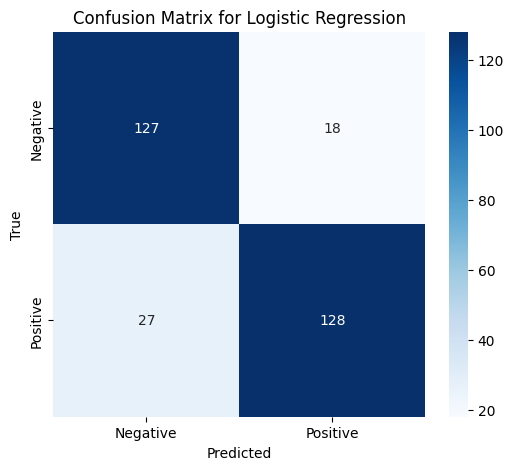

In [17]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [18]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 85.00%
Precision: 0.88
Recall: 0.83
F1-Score: 0.85


In [19]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Generate an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model with class weights
log_reg = LogisticRegression(class_weight='balanced')  # Automatically adjust weights based on the class distribution

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 85.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       240
           1       0.60      0.77      0.67        60

    accuracy                           0.85       300
   macro avg       0.77      0.82      0.79       300
weighted avg       0.87      0.85      0.86       300



In [20]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset (ensure to have 'train.csv' file in the working directory or provide the URL)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Display first few rows of the dataset
print(data.head())

# Handle missing values:
# Use SimpleImputer to fill missing numerical values with the median and categorical with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
#data['Embarked'] = imputer.fit_transform(data[['Embarked']])

# For numerical values, use median for missing 'Age' and 'Fare'
data['Age'] = SimpleImputer(strategy='median').fit_transform(data[['Age']])
data['Fare'] = SimpleImputer(strategy='median').fit_transform(data[['Fare']])

# Drop the 'Cabin' column as it's too sparse and may not be useful
data = data.drop(columns=['Cabin'])

# Drop 'Name' and 'Ticket' columns since they don't provide numerical value for prediction
data = data.drop(columns=['Name', 'Ticket'])

# Convert categorical variables 'Sex' and 'Embarked' into numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values (optional but often useful for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for detailed performance metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

Accuracy with raw (unscaled) data: 0.8500
Accuracy with standardized data: 0.8500


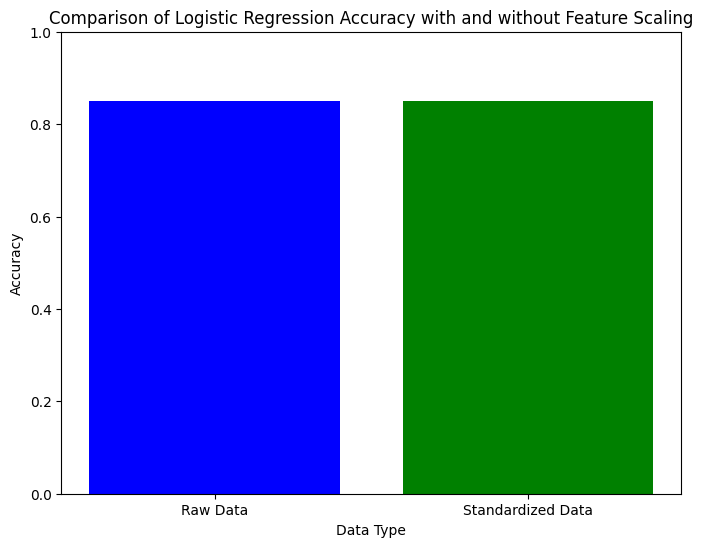

In [21]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression on raw (unscaled) data
model_raw = LogisticRegression(max_iter=1000, random_state=42)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the data (feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Display results
print(f"Accuracy with raw (unscaled) data: {accuracy_raw:.4f}")
print(f"Accuracy with standardized data: {accuracy_scaled:.4f}")

# Plot the accuracies for comparison
labels = ['Raw Data', 'Standardized Data']
accuracies = [accuracy_raw, accuracy_scaled]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Accuracy with and without Feature Scaling')
plt.ylim(0, 1)
plt.show()


In [22]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset (e.g., breast cancer dataset for binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')


ROC-AUC Score: 0.9979


In [23]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset (e.g., breast cancer dataset for binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with a custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9883


In [24]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset (e.g., breast cancer dataset for binary classification)
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Get the model coefficients and associate them with feature names
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # Absolute value of coefficients to measure importance
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("\nTop 10 Important Features Based on Coefficients:")
print(feature_importance.head(10))


Accuracy: 0.9825

Top 10 Important Features Based on Coefficients:
                 Feature  Coefficient  Importance
21         worst texture    -1.291134    1.291134
10          radius error    -1.244185    1.244185
28        worst symmetry    -1.202497    1.202497
7    mean concave points    -1.103646    1.103646
26       worst concavity    -0.974874    0.974874
13            area error    -0.868623    0.868623
20          worst radius    -0.814530    0.814530
27  worst concave points    -0.808050    0.808050
23            worst area    -0.774047    0.774047
6         mean concavity    -0.747674    0.747674


In [25]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset (e.g., breast cancer dataset for binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')


Cohen’s Kappa Score: 0.9624


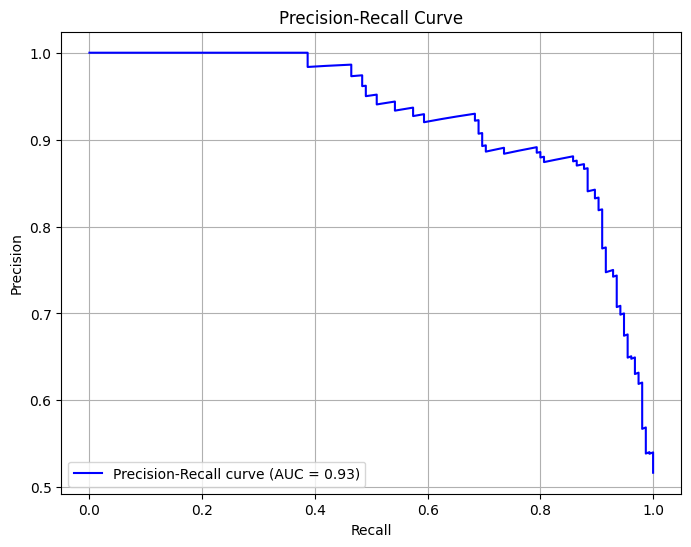

In [26]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute the AUC of the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


Accuracy with solver 'liblinear': 0.8500
Accuracy with solver 'saga': 0.8500
Accuracy with solver 'lbfgs': 0.8500


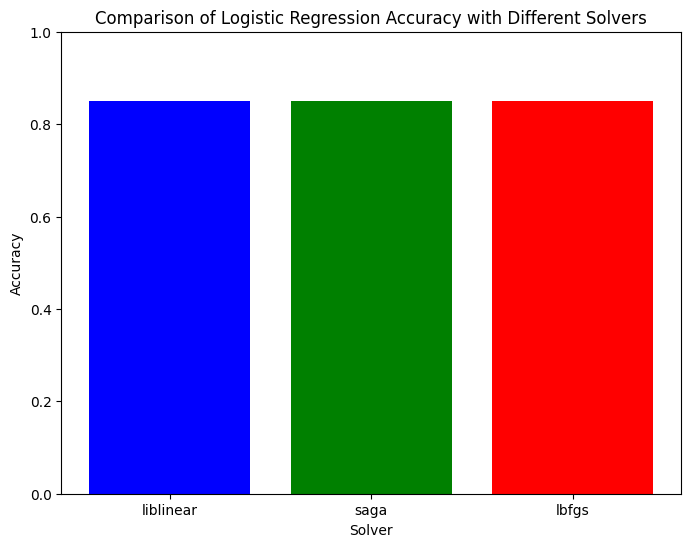

In [27]:
# 21.  Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define solvers
solvers = ['liblinear', 'saga', 'lbfgs']
accuracies = []

# Train Logistic Regression with different solvers and compute accuracy
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display results
for solver, accuracy in zip(solvers, accuracies):
    print(f"Accuracy with solver '{solver}': {accuracy:.4f}")

# Plot the accuracies of the different solvers
plt.figure(figsize=(8, 6))
plt.bar(solvers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Accuracy with Different Solvers')
plt.ylim(0, 1)
plt.show()




In [28]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import matthews_corrcoef

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Display the result
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



Matthews Correlation Coefficient (MCC): 0.7015


In [29]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=1000, random_state=42)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Display results
print(f"Accuracy with raw data: {accuracy_raw:.4f}")
print(f"Accuracy with standardized data: {accuracy_scaled:.4f}")

# Plot the accuracies
labels = ['Raw Data', 'Standardized Data']
labels


Accuracy with raw data: 0.8500
Accuracy with standardized data: 0.8500


['Raw Data', 'Standardized Data']

Optimal C: 0.004832930238571752
Best cross-validation accuracy: 0.8757
Test accuracy with optimal C: 0.8500


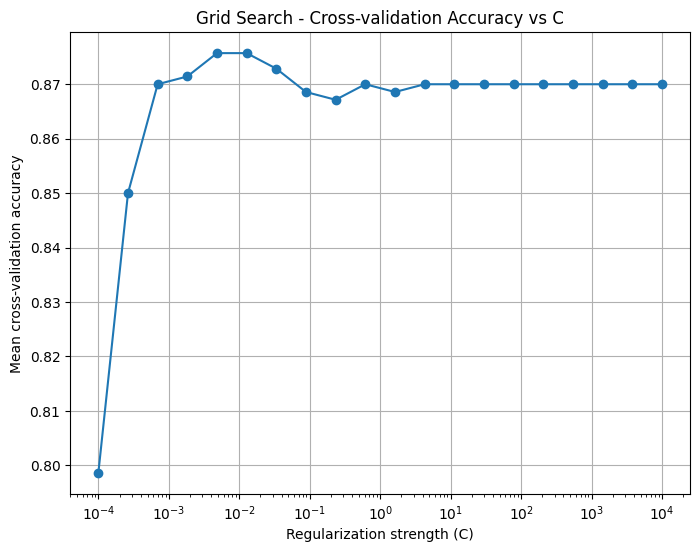

In [30]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Define the range of C values to search over (inverse regularization strength)
param_grid = {'C': np.logspace(-4, 4, 20)}  # Search C from 10^-4 to 10^4

# Use GridSearchCV to find the optimal C using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best C value and the corresponding accuracy
optimal_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

# Display the results
print(f"Optimal C: {optimal_C}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")

# Evaluate the model with the optimal C on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Display test accuracy
print(f"Test accuracy with optimal C: {test_accuracy:.4f}")

# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.semilogx(grid_search.cv_results_['param_C'], grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Mean cross-validation accuracy')
plt.title('Grid Search - Cross-validation Accuracy vs C')
plt.grid(True)
plt.show()


In [31]:
# 25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Save the trained model using joblib
joblib_file = "logistic_regression_model.joblib"
joblib.dump(model, joblib_file)
print(f"Model saved to {joblib_file}")

# Load the saved model
loaded_model = joblib.load(joblib_file)
print("Model loaded successfully!")

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.4f}")


Model saved to logistic_regression_model.joblib
Model loaded successfully!
Accuracy of the loaded model: 0.8500
